In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import warnings

# Ignore specific warning
warnings.filterwarnings("ignore", category=UserWarning, module='keras.src.trainers.data_adapters.py_dataset_adapter')


In [2]:
pip install tensorflow


  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------------- ------ 41.0/48.7 kB 991.0 kB/s eta 0:00:01
     ------------------------------- ------ 41.0/48.7 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 352.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB 4.1 MB/s eta 0:01:33
   ---------------------------------------- 0.1/377.0 MB 1.3 MB/s eta 0:04:46
   ---------------------------------------- 0.2/377.0 MB 1.5 MB/s eta 0:04:11
   ---------------------------------------- 0.2/377.0 MB 1.6 MB/s eta 0:04:03
   ---------------------------------------- 0.2/377.0 MB 1.1 MB/s eta 0:05:40
   -----------

In [3]:
# Set paths
base_dir = r'C:\Users\hp\Downloads\Lungs Dataset'

# Image parameters
img_size = (224, 224)  # Resize images to 224x224
batch_size = 32


## Data Augmentation and Loading

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Use ImageDataGenerator for data augmentation and loading
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Split data into training and validation sets
    horizontal_flip=True,
    zoom_range=0.2,
    rotation_range=20,
    shear_range=0.2,
    fill_mode='nearest'
)

## Load Training Data

In [5]:
# Training data
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 5702 images belonging to 4 classes.


## Load Data Validation

In [6]:
# Validation data
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1424 images belonging to 4 classes.


## Build the Model

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the model
model = Sequential([
    Input(shape=(224, 224, 3)),  # Define the input shape using the Input layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes: COVID-19, NORMAL, PNEUMONIA, TUBERCULOSIS
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 410s 2s/step - accuracy: 0.6476 - loss: 0.8706 - val_accuracy: 0.8539 - val_loss: 0.5506
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 350s 2s/step - accuracy: 0.9151 - loss: 0.2333 - val_accuracy: 0.8996 - val_loss: 0.3149
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step - accuracy: 0.9485 - loss: 0.1405 - val_accuracy: 0.9909 - val_loss: 0.0376
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step - accuracy: 0.9533 - loss: 0.1358 - val_accuracy: 0.9860 - val_loss: 0.0364
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 342s 2s/step - accuracy: 0.9687 - loss: 0.0948 - val_accuracy: 0.9508 - val_loss: 0.1032
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 343s 2s/step - accuracy: 0.9707 - loss: 0.0856 - val_accuracy: 0.9944 - val_loss: 0.0184
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 342s 2s/step - accuracy: 0.9816 - loss: 0.0577 - val_accuracy: 0.9965 - val_loss: 0.0123
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 345s 2s/step - accuracy: 0.9795 - loss: 0.0574 - val_accu

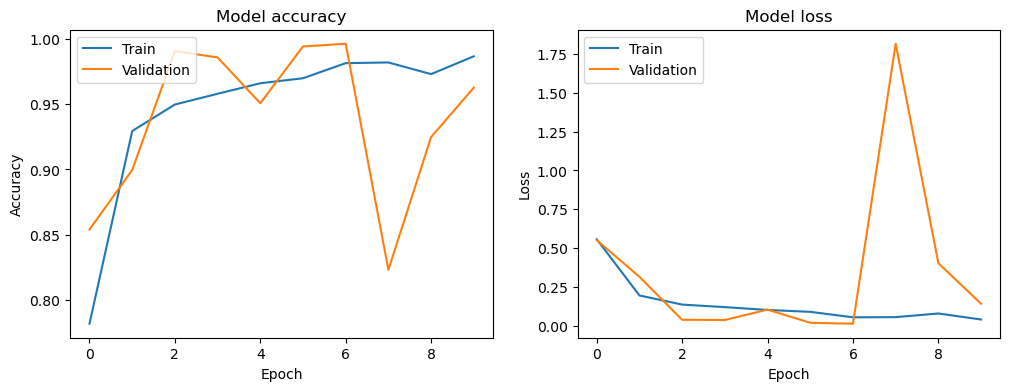

In [9]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

## Prediction Data

In [10]:
# Load an image for prediction
img_path = r'C:\Users\hp\Downloads\Lungs Dataset\NORMAL\1 (50).png'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize

# Predict the class
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Print the predicted class
class_names = ['COVID-19', 'NORMAL', 'PNEUMONIA', 'TUBERCULOSIS']
print("Predicted class:", class_names[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
Predicted class: NORMAL


In [12]:
pip install shap


   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   -- ------------------------------------ 30.7/456.1 kB 660.6 kB/s eta 0:00:01
   ----- --------------------------------- 61.4/456.1 kB 656.4 kB/s eta 0:00:01
   --------- ---------------------------- 112.6/456.1 kB 819.2 kB/s eta 0:00:01
   ----------------- ---------------------- 194.6/456.1 kB 1.1 MB/s eta 0:00:01
   ---------------------- ----------------- 256.0/456.1 kB 1.1 MB/s eta 0:00:01
   --------------------------- ------------ 317.4/456.1 kB 1.2 MB/s eta 0:00:01
   ----------------------------------- ---- 399.4/456.1 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  450.6/456.1 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 456.1/456.1 kB 1.2 MB/s eta 0:00:00


In [13]:
from tensorflow.keras.models import load_model
import shap

In [24]:

# Use SHAP for model interpretation with GradientExplainer
# Select a subset of validation data for SHAP analysis
X_val, y_val = next(validation_generator)
background = X_val[:100]  # Use a subset of data for explainer
explainer = shap.GradientExplainer(model, background)

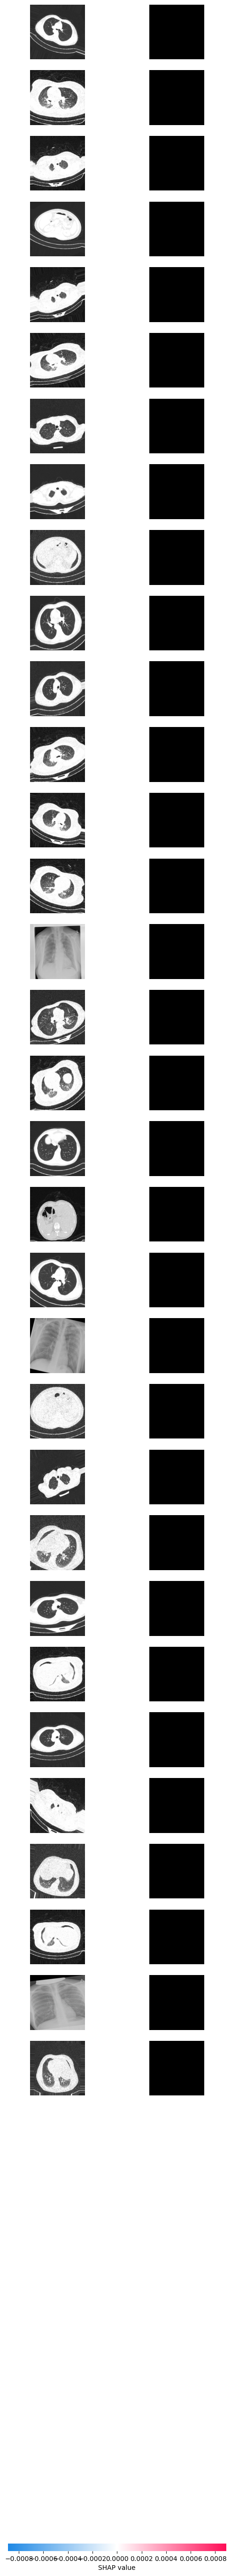

In [25]:
# Explain predictions on a set of test images
shap_values = explainer.shap_values(X_val[:50])

# Visualize the feature importance for the first 10 validation images
for i in range(len(shap_values)):
    shap_values[i] = np.clip(shap_values[i], 0, 1)  # Ensure valid range for RGB data
shap.image_plot(shap_values, X_val[:50])

In [26]:
# Determine the most influential disease (class) in the model's predictions
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Exclude "NORMAL" class (index 1) from consideration
class_counts = np.bincount(predicted_classes)
class_counts[1] = 0  # Set count for "NORMAL" to 0
most_influential_disease = np.argmax(class_counts)

print(f"The most influential disease in the dataset is: {class_names[most_influential_disease]}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step
The most influential disease in the dataset is: PNEUMONIA
